In [5]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt; plt.rc('font', size=16)

https://stackoverflow.com/questions/11278836/fitting-data-to-system-of-odes-using-python-via-scipy-numpy

In [55]:
params_ex = {'growth': np.array([3.5, 3.3, 4]), 'cross_int': np.array([[-1.2, 6, -4], [-5, -1.5, 4], [5, -5.5, -2]])}
x0_ex = np.array([0.5, 0.5, 0.5])
t_span_ex = [0, 10]

In [57]:
def gLV(x, t, params):
    growth = params['growth']
    cross_int = params['cross_int']

    inter = np.sum([x[i]*cross_int[i,j] for i in range(len(x)) for j in range(len(x))])

    return np.array([x[i]*(growth[i] + inter) for i in range(len(x))])

def model(fun=gLV, t_span=t_span_ex, x0=x0_ex, params=params_ex):
    return integrate.solve_ivp(lambda t, x: gLV(x, t, params), t_span, x0)

def f_resid(x, t, params):
    return y - model()[:,1]
def optim(self, p_quess):
    return optimize.leastsq(f_resid, p_guess) # fit params

In [60]:
sol = model()
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.09189965,  0.52018487,  0.94847009,  1.33412757,
        1.83025795,  2.45978613,  3.3200543 ,  4.42712666,  5.11621175,
        5.80529685,  6.73435217,  7.64941068,  8.47076647,  9.29212225,
       10.        ])
 t_events: None
        y: array([[5.00000000e-01, 5.60883042e-01, 7.13358559e-01, 6.97995072e-01,
        6.34046602e-01, 5.37992096e-01, 4.21476409e-01, 2.89979314e-01,
        1.72135240e-01, 1.23201688e-01, 8.77282593e-02, 5.52548264e-02,
        3.49688971e-02, 2.31851127e-02, 1.53692829e-02, 1.07889065e-02],
       [5.00000000e-01, 5.50668212e-01, 6.42885138e-01, 5.77494417e-01,
        4.85647484e-01, 3.73147400e-01, 2.57745988e-01, 1.49294574e-01,
        7.09990847e-02, 4.42699436e-02, 2.74640660e-02, 1.43637426e-02,
        7.56875408e-03, 4.25730406e-03, 2.39420874e-

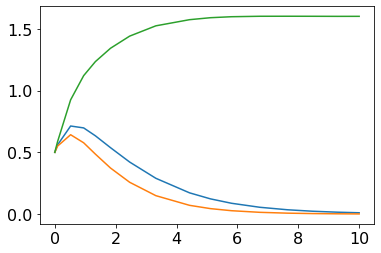

In [59]:
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.show()